# Diabetes Prediction (Gradient Boosting)

In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from pickle import dump

In [3]:
df = pd.read_csv('../data/processed/diabetes_clean.csv')

# Split data into train and test sets
df_train, df_test = train_test_split(df, test_size=0.1, stratify=df['outcome'], random_state=2025)

# Reset index
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Split features and target
X_train = df_train.drop(columns=['outcome'])
y_train = df_train['outcome']

X_test = df_test.drop(columns=['outcome'])
y_test = df_test['outcome']

# Encode target
encoder = LabelEncoder()

y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

In [4]:
# Machine learning model
gb_clf = GradientBoostingClassifier(random_state=2025)
gb_clf.fit(X_train, y_train_enc)
y_pred = gb_clf.predict(X_test)

'Accuracy score:'

0.7922077922077922

'              precision    recall  f1-score   support\n\n    diabetes       0.72      0.67      0.69        27\n no_diabetes       0.83      0.86      0.84        50\n\n    accuracy                           0.79        77\n   macro avg       0.77      0.76      0.77        77\nweighted avg       0.79      0.79      0.79        77\n'

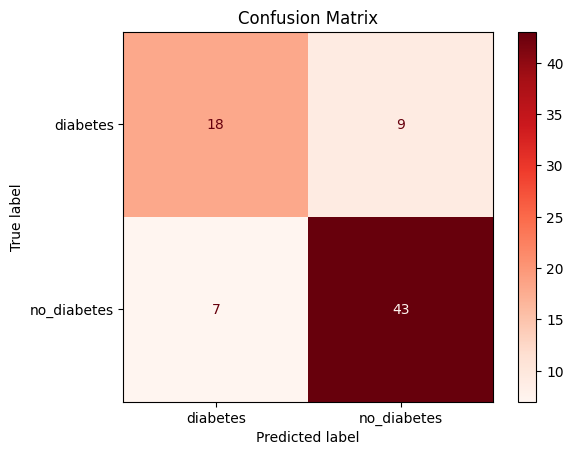

In [5]:
# Accuracy and classification report
display('Accuracy score:', accuracy_score(y_test_enc, y_pred))
display(classification_report(y_test_enc, y_pred, target_names=df['outcome'].unique()))

cm = confusion_matrix(y_test_enc, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['outcome'].unique())
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

This raw model is better than the decision tree in terms of accuracy and recall. Though, this model is not as good as the random forest's model, it still needs some tuning before considering it a useful model. 

In [6]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gb_clf_cv = GridSearchCV(
    gb_clf,
    param_grid=param_grid,
    cv=5
)

gb_clf_cv.fit(X_train, y_train_enc)
gb_clf_cv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

'Accuracy score:'

0.8051948051948052

'              precision    recall  f1-score   support\n\n    diabetes       0.75      0.67      0.71        27\n no_diabetes       0.83      0.88      0.85        50\n\n    accuracy                           0.81        77\n   macro avg       0.79      0.77      0.78        77\nweighted avg       0.80      0.81      0.80        77\n'

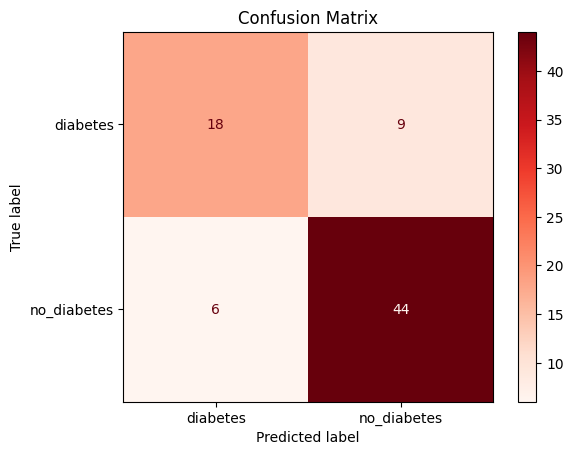

In [7]:
# Accuracy and classification report
y_pred = gb_clf_cv.predict(X_test)

display('Accuracy score:', accuracy_score(y_test_enc, y_pred))
display(classification_report(y_test_enc, y_pred, target_names=df['outcome'].unique()))

cm = confusion_matrix(y_test_enc, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['outcome'].unique())
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

This optimized Boosting Algorithm model performs better than the tuned random forest one for the no_diabetes label, it has higher recall, slightly lower precission, but the same f1 score. On the diabetes label, its recall its lower than the random forest, but it outperforms that model in precision. 

In [8]:
# Save models
dump(gb_clf, open('../models/gradient_boosting_model_raw.sav', 'wb'))
dump(gb_clf_cv, open('../models/gradient_boosting_tuned_model.sav', 'wb'))